<a href="https://colab.research.google.com/github/suacalis/IK_Analitigi_2026/blob/main/pandas_egitim_notu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐼 PANDAS – Veri İşleme ve Analiz Kütüphanesi

## İnsan Kaynakları Analitiği Dersi için Python Eğitim Notu

---

> Pandas, Python'da etiketli verileri işlemek, analiz etmek ve dönüştürmek için kullanılan temel kütüphanedir. Series (1 boyutlu) ve DataFrame (2 boyutlu) veri yapıları ile çalışır. Bu not defterinde tüm örnekler İnsan Kaynakları (HR) senaryoları üzerine kurgulanmıştır.

### İçindekiler

**BÖLÜM A – Temel Kavramlar ve Veri Yapıları**
1. Pandas'a Giriş ve Kurulum
2. Series Oluşturma
3. DataFrame Oluşturma
4. DataFrame'e Satır ve Sütun Ekleme
5. DataFrame'den Satır ve Sütun Silme

**BÖLÜM B – Veri İçe Aktarma ve Temel Fonksiyonlar**
6. Veri İçe Aktarma (CSV, Excel, JSON)
7. Temel Bilgi Fonksiyonları (`info`, `describe`, `head`, `tail`)
8. Matematiksel ve İstatistiksel Fonksiyonlar
9. Sıralama Fonksiyonları (`sort_values`)

**BÖLÜM C – Veri Çıkarma ve Filtreleme**
10. İlişkisel Operatörlerle Filtreleme
11. Mantıksal Operatörlerle Filtreleme (`&`, `|`)
12. `iloc` ile Veri Çıkarma (Konum Bazlı)
13. `loc` ile Veri Çıkarma (Etiket Bazlı)
14. Özel Fonksiyonlarla Filtreleme (`startswith`, `isin`, `between`, `str.contains`)

**BÖLÜM D – İleri Düzey İşlemler**
15. `groupby()` ile Gruplama ve Toplama
16. `merge`, `concat`, `join` ile Birleştirme
17. `pivot_table` ve `crosstab`
18. `apply`, `map`, `lambda` ile Dönüştürme
19. Eksik Veri Yönetimi (Missing Values)
20. Tarih/Zaman İşlemleri (`datetime`)

**BÖLÜM E – Görselleştirme, Dışa Aktarma ve Sorular**
21. Pandas ile Temel Grafikler
22. Veri Dışa Aktarma
23. Kapsamlı HR Analizi Uygulaması
24. Çoktan Seçmeli Sorular
25. Fonksiyon Özet Tablosu

---
# BÖLÜM A – Temel Kavramlar ve Veri Yapıları
---

## 1. Pandas'a Giriş ve Kurulum

Pandas kütüphanesi, farklı boyutlardaki etiketli verileri işlemek için tasarlanmıştır. İki temel veri yapısı vardır:

| Yapı | Boyut | Açıklama |
|------|-------|----------|
| **Series** | 1-D | Etiketli tek boyutlu veri (bir sütun gibi) |
| **DataFrame** | 2-D | Etiketli iki boyutlu veri (tablo / spreadsheet gibi) |

DataFrame, RDBMS'deki bir tablo veya Excel'deki bir çalışma sayfasına benzer. Farklı veri tiplerinde sütunlar içerebilir.

In [1]:
# Kütüphaneyi içe aktar
import pandas as pd
import numpy as np

print('Pandas sürüm:', pd.__version__)

Pandas sürüm: 2.2.2


---
## 2. Series Oluşturma

`Series()` fonksiyonu ile bir boyutlu etiketli veri oluşturulur.

**Söz dizimi:** `pd.Series(data, index=etiket_listesi)`

In [2]:
# HR Örnek: Departman bazında çalışan sayısı (Series)
calisan_sayisi = pd.Series(
    [150, 90, 45, 70, 65],
    index=['Mühendislik', 'Pazarlama', 'İK', 'Finans', 'Operasyon'],
    name='Çalışan Sayısı'
)

print(calisan_sayisi)
print()
print(f'Toplam çalışan: {calisan_sayisi.sum()}')
print(f'Ortalama: {calisan_sayisi.mean():.0f}')
print(f'En büyük departman: {calisan_sayisi.idxmax()} ({calisan_sayisi.max()} kişi)')

Mühendislik    150
Pazarlama       90
İK              45
Finans          70
Operasyon       65
Name: Çalışan Sayısı, dtype: int64

Toplam çalışan: 420
Ortalama: 84
En büyük departman: Mühendislik (150 kişi)


---
## 3. DataFrame Oluşturma

`DataFrame()` fonksiyonu ile iki boyutlu etiketli veri yapısı oluşturulur.

**Söz dizimi:** `pd.DataFrame(data, columns=sütun_isimleri)`

DataFrame'in boyutu `shape`, sütun isimleri `keys()` veya `columns`, toplam eleman sayısı `size` ile belirlenir.

In [3]:
# HR Örnek: Sözlükten DataFrame oluşturma
hr_mini = pd.DataFrame({
    'Ad': ['Ahmet Yılmaz', 'Ayşe Kara', 'Mehmet Demir', 'Fatma Çelik', 'Ali Koç'],
    'Departman': ['Mühendislik', 'Pazarlama', 'İK', 'Finans', 'Mühendislik'],
    'Pozisyon': ['Senior', 'Mid', 'Müdür', 'Junior', 'Lead'],
    'Yas': [32, 28, 45, 24, 38],
    'Maas': [22000, 16000, 28000, 12000, 30000],
    'Kidem_Yil': [5.2, 2.1, 12.0, 0.8, 8.5]
})

print(f'Boyut (shape): {hr_mini.shape}')
print(f'Toplam eleman (size): {hr_mini.size}')
print(f'Sütunlar: {list(hr_mini.keys())}')
print(f'Veri tipleri:\n{hr_mini.dtypes}')
print()
hr_mini

Boyut (shape): (5, 6)
Toplam eleman (size): 30
Sütunlar: ['Ad', 'Departman', 'Pozisyon', 'Yas', 'Maas', 'Kidem_Yil']
Veri tipleri:
Ad            object
Departman     object
Pozisyon      object
Yas            int64
Maas           int64
Kidem_Yil    float64
dtype: object



,Ad,Departman,Pozisyon,Yas,Maas,Kidem_Yil
0,Ahmet Yılmaz,Mühendislik,Senior,32,22000,5.2
1,Ayşe Kara,Pazarlama,Mid,28,16000,2.1
2,Mehmet Demir,İK,Müdür,45,28000,12.0
3,Fatma Çelik,Finans,Junior,24,12000,0.8
4,Ali Koç,Mühendislik,Lead,38,30000,8.5


In [4]:
# Listelerden DataFrame oluşturma
veriler = [
    ['Zeynep', 'Satış', 27, 15000],
    ['Burak', 'Operasyon', 33, 18000],
    ['Selin', 'Pazarlama', 29, 17000]
]
df_liste = pd.DataFrame(veriler, columns=['Ad', 'Departman', 'Yas', 'Maas'])
df_liste

,Ad,Departman,Yas,Maas
0,Zeynep,Satış,27,15000
1,Burak,Operasyon,33,18000
2,Selin,Pazarlama,29,17000


---
## 4. DataFrame'e Satır ve Sütun Ekleme

- **Satır ekleme:** `pd.concat()` ile iki DataFrame birleştirilir (eski `append()` yerine)
- **Sütun ekleme:** `df['yeni_sutun'] = degerler` şeklinde doğrudan atama yapılır

In [5]:
# Yeni çalışan ekleme (satır)
yeni_calisan = pd.DataFrame({
    'Ad': ['Derya Aydın', 'Can Öztürk'],
    'Departman': ['Finans', 'Mühendislik'],
    'Pozisyon': ['Mid', 'Junior'],
    'Yas': [30, 25],
    'Maas': [18500, 14000],
    'Kidem_Yil': [3.5, 1.0]
})

hr_genisletilmis = pd.concat([hr_mini, yeni_calisan], ignore_index=True)
print(f'Ekleme öncesi: {hr_mini.shape}, Ekleme sonrası: {hr_genisletilmis.shape}')
print()

# Yeni sütun ekleme
hr_genisletilmis['Performans'] = [4, 3, 5, 3, 4, 4, 3]
hr_genisletilmis['Yillik_Maas'] = hr_genisletilmis['Maas'] * 12

print(f'Sütun ekleme sonrası: {hr_genisletilmis.shape}')
hr_genisletilmis

Ekleme öncesi: (5, 6), Ekleme sonrası: (7, 6)

Sütun ekleme sonrası: (7, 8)


,Ad,Departman,Pozisyon,Yas,Maas,Kidem_Yil,Performans,Yillik_Maas
0,Ahmet Yılmaz,Mühendislik,Senior,32,22000,5.2,4,264000
1,Ayşe Kara,Pazarlama,Mid,28,16000,2.1,3,192000
2,Mehmet Demir,İK,Müdür,45,28000,12.0,5,336000
3,Fatma Çelik,Finans,Junior,24,12000,0.8,3,144000
4,Ali Koç,Mühendislik,Lead,38,30000,8.5,4,360000
5,Derya Aydın,Finans,Mid,30,18500,3.5,4,222000
6,Can Öztürk,Mühendislik,Junior,25,14000,1.0,3,168000


---
## 5. DataFrame'den Satır ve Sütun Silme

`drop()` fonksiyonu ile satırlar (`index` parametresi) veya sütunlar (`columns` parametresi) silinir.

In [6]:
# Sütun silme
df_temiz = hr_genisletilmis.drop(columns=['Yillik_Maas'])
print(f'Sütun silme sonrası: {df_temiz.shape}')
print(f'Kalan sütunlar: {list(df_temiz.columns)}')
print()

# Satır silme (index ile)
df_temiz2 = hr_genisletilmis.drop(index=[0, 2])  # 0. ve 2. satırları sil
print(f'Satır silme sonrası: {df_temiz2.shape}')
df_temiz2

Sütun silme sonrası: (7, 7)
Kalan sütunlar: ['Ad', 'Departman', 'Pozisyon', 'Yas', 'Maas', 'Kidem_Yil', 'Performans']

Satır silme sonrası: (5, 8)


,Ad,Departman,Pozisyon,Yas,Maas,Kidem_Yil,Performans,Yillik_Maas
1,Ayşe Kara,Pazarlama,Mid,28,16000,2.1,3,192000
3,Fatma Çelik,Finans,Junior,24,12000,0.8,3,144000
4,Ali Koç,Mühendislik,Lead,38,30000,8.5,4,360000
5,Derya Aydın,Finans,Mid,30,18500,3.5,4,222000
6,Can Öztürk,Mühendislik,Junior,25,14000,1.0,3,168000


---
# BÖLÜM B – Veri İçe Aktarma ve Temel Fonksiyonlar
---

## 6. Veri İçe Aktarma

Pandas, farklı dosya formatlarından veri okuyabilir:

| Fonksiyon | Dosya Türü |
|-----------|-----------|
| `read_csv()` | CSV dosyası |
| `read_excel()` | Excel dosyası (.xlsx, .xls) |
| `read_json()` | JSON dosyası |
| `read_html()` | HTML tablosu |
| `read_sql()` | SQL veritabanı |

Bu eğitim notunda gerçekçi bir HR veri seti oluşturup kullanacağız:

In [7]:
# ===== KAPSAMLI HR VERİ SETİ OLUŞTURMA =====
np.random.seed(42)
n = 500

departmanlar = np.random.choice(
    ['Mühendislik', 'Pazarlama', 'İK', 'Finans', 'Operasyon', 'Satış'], n,
    p=[0.25, 0.18, 0.10, 0.15, 0.15, 0.17])

dept_maas = {'Mühendislik': 20000, 'Finans': 18000, 'Satış': 15000,
             'Pazarlama': 16000, 'İK': 14000, 'Operasyon': 14500}
poz_carpan = {'Junior': 1.0, 'Mid': 1.25, 'Senior': 1.55, 'Lead': 1.85, 'Müdür': 2.3}

pozisyonlar = np.random.choice(['Junior', 'Mid', 'Senior', 'Lead', 'Müdür'], n,
                                p=[0.25, 0.30, 0.25, 0.12, 0.08])

hr = pd.DataFrame({
    'Calisan_ID': [f'EMP-{i:04d}' for i in range(1, n+1)],
    'Ad': [f'Çalışan_{i}' for i in range(1, n+1)],
    'Cinsiyet': np.random.choice(['Erkek', 'Kadın'], n, p=[0.55, 0.45]),
    'Departman': departmanlar,
    'Pozisyon': pozisyonlar,
    'Yas': np.random.normal(34, 8, n).clip(22, 62).astype(int),
    'Kidem_Yil': np.random.exponential(4.5, n).clip(0.5, 22).round(1),
    'Egitim': np.random.choice(['Lisans', 'Yüksek Lisans', 'Doktora'], n,
                                p=[0.55, 0.35, 0.10]),
    'Calisma_Sekli': np.random.choice(['Ofis', 'Uzaktan', 'Hibrit'], n,
                                       p=[0.35, 0.30, 0.35]),
    'Performans': np.random.choice([1, 2, 3, 4, 5], n,
                                    p=[0.04, 0.12, 0.34, 0.32, 0.18]),
    'Memnuniyet': np.random.uniform(2, 10, n).round(1),
    'Egitim_Saati': np.random.normal(40, 15, n).clip(5, 100).astype(int),
    'Ayrilma': np.random.choice(['Aktif', 'Ayrıldı'], n, p=[0.83, 0.17]),
})

# Maaş hesapla
hr['Maas'] = hr.apply(
    lambda r: int(dept_maas[r['Departman']] * poz_carpan[r['Pozisyon']]
                  + r['Kidem_Yil'] * 400 + np.random.normal(0, 1500)), axis=1)
hr['Maas'] = hr['Maas'].clip(9000, 65000)

# Bazı eksik değerler ekle (Bölüm 19 için)
eksik_idx = np.random.choice(n, 30, replace=False)
hr.loc[eksik_idx[:10], 'Memnuniyet'] = np.nan
hr.loc[eksik_idx[10:20], 'Egitim_Saati'] = np.nan
hr.loc[eksik_idx[20:], 'Kidem_Yil'] = np.nan

# İşe başlama tarihi ekle
hr['Ise_Baslama'] = pd.to_datetime(
    np.random.choice(pd.date_range('2015-01-01', '2025-06-01', freq='D'), n))

print(f'HR Veri Seti: {hr.shape[0]} satır × {hr.shape[1]} sütun')
print(f'Sütunlar: {list(hr.columns)}')
hr.head()

HR Veri Seti: 500 satır × 15 sütun
Sütunlar: ['Calisan_ID', 'Ad', 'Cinsiyet', 'Departman', 'Pozisyon', 'Yas', 'Kidem_Yil', 'Egitim', 'Calisma_Sekli', 'Performans', 'Memnuniyet', 'Egitim_Saati', 'Ayrilma', 'Maas', 'Ise_Baslama']


,Calisan_ID,Ad,Cinsiyet,Departman,Pozisyon,Yas,Kidem_Yil,Egitim,Calisma_Sekli,Performans,Memnuniyet,Egitim_Saati,Ayrilma,Maas,Ise_Baslama
0,EMP-0001,Çalışan_1,Erkek,Pazarlama,Senior,22,2.9,Lisans,Ofis,4,9.3,55.0,Aktif,25840,2018-11-26
1,EMP-0002,Çalışan_2,Erkek,Satış,Mid,52,7.8,Lisans,Uzaktan,2,7.2,53.0,Aktif,21419,2022-09-13
2,EMP-0003,Çalışan_3,Kadın,Operasyon,Mid,22,2.8,Doktora,Hibrit,3,2.8,22.0,Aktif,17736,2022-07-16
3,EMP-0004,Çalışan_4,Kadın,Finans,Lead,22,2.0,Lisans,Hibrit,3,5.2,52.0,Aktif,34640,2023-11-22
4,EMP-0005,Çalışan_5,Kadın,Mühendislik,Senior,42,3.1,Lisans,Hibrit,4,7.8,39.0,Ayrıldı,31433,2022-02-05


In [8]:
# CSV olarak kaydet ve geri oku (veri içe aktarma örneği)
hr.to_csv('hr_verisi.csv', index=False, encoding='utf-8-sig')
print('CSV dosyası kaydedildi: hr_verisi.csv')

# CSV'den okuma
hr_csv = pd.read_csv('hr_verisi.csv', parse_dates=['Ise_Baslama'])
print(f'CSV\'den okunan boyut: {hr_csv.shape}')

# Excel'e kaydetme (openpyxl gerektirir)
# hr.to_excel('hr_verisi.xlsx', index=False, sheet_name='Calisanlar')
# hr_excel = pd.read_excel('hr_verisi.xlsx')

CSV dosyası kaydedildi: hr_verisi.csv
CSV'den okunan boyut: (500, 15)


---
## 7. Temel Bilgi Fonksiyonları

| Fonksiyon | Açıklama |
|-----------|----------|
| `shape` | Satır ve sütun sayısı (tuple) |
| `size` | Toplam eleman sayısı |
| `dtypes` | Her sütunun veri tipi |
| `info()` | Veri tipi, eksik değer sayısı, bellek kullanımı |
| `describe()` | Sayısal sütunlar için istatistiksel özet (ortalama, std, min, max, çeyrekler) |
| `head(n)` | İlk n kaydı gösterir (varsayılan 5) |
| `tail(n)` | Son n kaydı gösterir (varsayılan 5) |
| `keys()` / `columns` | Sütun isimlerini gösterir |
| `values` | Değerleri NumPy dizisi olarak döndürür |
| `nunique()` | Her sütundaki benzersiz değer sayısı |
| `value_counts()` | Değerlerin frekansı |

In [9]:
# info() – Genel bilgi
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Calisan_ID     500 non-null    object        
 1   Ad             500 non-null    object        
 2   Cinsiyet       500 non-null    object        
 3   Departman      500 non-null    object        
 4   Pozisyon       500 non-null    object        
 5   Yas            500 non-null    int64         
 6   Kidem_Yil      490 non-null    float64       
 7   Egitim         500 non-null    object        
 8   Calisma_Sekli  500 non-null    object        
 9   Performans     500 non-null    int64         
 10  Memnuniyet     490 non-null    float64       
 11  Egitim_Saati   490 non-null    float64       
 12  Ayrilma        500 non-null    object        
 13  Maas           500 non-null    int64         
 14  Ise_Baslama    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), f

In [10]:
# describe() – İstatistiksel özet
hr.describe()

,Yas,Kidem_Yil,Performans,Memnuniyet,Egitim_Saati,Maas,Ise_Baslama
count,500.000000,490.000000,500.000000,490.000000,490.000000,500.000000,500
mean,34.220000,4.394286,3.454000,5.958367,38.755102,25158.190000,2020-06-25 00:57:36
min,22.000000,0.500000,1.000000,2.000000,5.000000,11382.000000,2015-01-03 00:00:00
25%,28.000000,1.500000,3.000000,4.000000,29.000000,19825.500000,2018-02-02 00:00:00
50%,34.000000,3.100000,3.000000,6.000000,39.000000,24146.000000,2020-07-20 00:00:00
75%,39.000000,6.100000,4.000000,7.800000,48.000000,29156.500000,2023-02-04 18:00:00
max,59.000000,22.000000,5.000000,10.000000,88.000000,51069.000000,2025-05-31 00:00:00
std,7.673419,4.145972,1.063082,2.262873,14.823199,7199.511187,NaN


In [11]:
# describe(include='all') – Kategorik sütunlar dahil
hr.describe(include='all')

,Calisan_ID,Ad,Cinsiyet,Departman,Pozisyon,Yas,Kidem_Yil,Egitim,Calisma_Sekli,Performans,Memnuniyet,Egitim_Saati,Ayrilma,Maas,Ise_Baslama
count,500,500,500,500,500,500.000000,490.000000,500,500,500.000000,490.000000,490.000000,500,500.000000,500
unique,500,500,2,6,5,NaN,NaN,3,3,NaN,NaN,NaN,2,NaN,NaN
top,EMP-0500,Çalışan_500,Erkek,Mühendislik,Mid,NaN,NaN,Lisans,Ofis,NaN,NaN,NaN,Aktif,NaN,NaN
freq,1,1,256,130,148,NaN,NaN,276,178,NaN,NaN,NaN,413,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,34.220000,4.394286,NaN,NaN,3.454000,5.958367,38.755102,NaN,25158.190000,2020-06-25 00:57:36
min,NaN,NaN,NaN,NaN,NaN,22.000000,0.500000,NaN,NaN,1.000000,2.000000,5.000000,NaN,11382.000000,2015-01-03 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,28.000000,1.500000,NaN,NaN,3.000000,4.000000,29.000000,NaN,19825.500000,2018-02-02 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,34.000000,3.100000,NaN,NaN,3.000000,6.000000,39.000000,NaN,24146.000000,2020-07-20 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,39.000000,6.100000,NaN,NaN,4.000000,7.800000,48.000000,NaN,29156.500000,2023-02-04 18:00:00
max,NaN,NaN,NaN,NaN,NaN,59.000000,22.000000,NaN,NaN,5.000000,10.000000,88.000000,NaN,51069.000000,2025-05-31 00:00:00


In [12]:
# head() ve tail()
print('=== İlk 3 Kayıt ===')
print(hr.head(3))
print()
print('=== Son 2 Kayıt ===')
print(hr.tail(2))

=== İlk 3 Kayıt ===
  Calisan_ID         Ad Cinsiyet  Departman Pozisyon  Yas  Kidem_Yil   Egitim  \
0   EMP-0001  Çalışan_1    Erkek  Pazarlama   Senior   22        2.9   Lisans   
1   EMP-0002  Çalışan_2    Erkek      Satış      Mid   52        7.8   Lisans   
2   EMP-0003  Çalışan_3    Kadın  Operasyon      Mid   22        2.8  Doktora   

  Calisma_Sekli  Performans  Memnuniyet  Egitim_Saati Ayrilma   Maas  \
0          Ofis           4         9.3          55.0   Aktif  25840   
1       Uzaktan           2         7.2          53.0   Aktif  21419   
2        Hibrit           3         2.8          22.0   Aktif  17736   

  Ise_Baslama  
0  2018-11-26  
1  2022-09-13  
2  2022-07-16  

=== Son 2 Kayıt ===
    Calisan_ID           Ad Cinsiyet Departman Pozisyon  Yas  Kidem_Yil  \
498   EMP-0499  Çalışan_499    Erkek     Satış    Müdür   25        6.9   
499   EMP-0500  Çalışan_500    Kadın     Satış      Mid   43        4.6   

            Egitim Calisma_Sekli  Performans  Memnuniye

In [13]:
# Belirli sütunları seçme
print(hr[['Ad', 'Departman', 'Maas']].head(5))
print()

# value_counts() – Kategorik değişken frekansı
print('=== Departman Dağılımı ===')
print(hr['Departman'].value_counts())
print()

# Yüzdesel dağılım
print('=== Yüzdesel Dağılım ===')
print(hr['Departman'].value_counts(normalize=True).round(3) * 100)

          Ad    Departman   Maas
0  Çalışan_1    Pazarlama  25840
1  Çalışan_2        Satış  21419
2  Çalışan_3    Operasyon  17736
3  Çalışan_4       Finans  34640
4  Çalışan_5  Mühendislik  31433

=== Departman Dağılımı ===
Departman
Mühendislik    130
Satış           88
Pazarlama       87
Finans          76
Operasyon       75
İK              44
Name: count, dtype: int64

=== Yüzdesel Dağılım ===
Departman
Mühendislik    26.0
Satış          17.6
Pazarlama      17.4
Finans         15.2
Operasyon      15.0
İK              8.8
Name: proportion, dtype: float64


In [14]:
# Benzersiz değerler
print(f'Benzersiz departman: {hr["Departman"].nunique()} → {hr["Departman"].unique()}')
print(f'Benzersiz pozisyon: {hr["Pozisyon"].nunique()} → {hr["Pozisyon"].unique()}')

# tolist() – DataFrame sütununu listeye çevirme
ilk_5_maas = hr['Maas'].head(5).tolist()
print(f'İlk 5 maaş (liste): {ilk_5_maas}')

Benzersiz departman: 6 → ['Pazarlama' 'Satış' 'Operasyon' 'Finans' 'Mühendislik' 'İK']
Benzersiz pozisyon: 5 → ['Senior' 'Mid' 'Lead' 'Junior' 'Müdür']
İlk 5 maaş (liste): [25840, 21419, 17736, 34640, 31433]


---
## 8. Matematiksel ve İstatistiksel Fonksiyonlar

| Fonksiyon | Açıklama | HR Örnek |
|-----------|----------|----------|
| `sum()` | Toplam | Toplam maaş gideri |
| `mean()` | Ortalama | Ortalama maaş |
| `median()` | Medyan | Medyan yaş |
| `min()` / `max()` | Min / Maks | En düşük/yüksek maaş |
| `std()` | Standart sapma | Maaş değişkenliği |
| `count()` | Eksik olmayan değer sayısı | Geçerli kayıt sayısı |
| `prod()` | Çarpım | - |
| `cumsum()` | Kümülatif toplam | Kümülatif işe alım |
| `corr()` | Korelasyon matrisi | Değişkenler arası ilişki |
| `nsmallest(n)` | En küçük n değer | En düşük maaşlı n kişi |
| `nlargest(n)` | En büyük n değer | En yüksek maaşlı n kişi |

In [15]:
# Temel istatistikler
print(f'Toplam maaş gideri: {hr["Maas"].sum():,.0f} TL')
print(f'Ortalama maaş: {hr["Maas"].mean():,.0f} TL')
print(f'Medyan maaş: {hr["Maas"].median():,.0f} TL')
print(f'En düşük maaş: {hr["Maas"].min():,.0f} TL')
print(f'En yüksek maaş: {hr["Maas"].max():,.0f} TL')
print(f'Standart sapma: {hr["Maas"].std():,.0f} TL')
print(f'Ortalama yaş: {hr["Yas"].mean():.1f}')
print(f'Medyan kıdem: {hr["Kidem_Yil"].median():.1f} yıl')

Toplam maaş gideri: 12,579,095 TL
Ortalama maaş: 25,158 TL
Medyan maaş: 24,146 TL
En düşük maaş: 11,382 TL
En yüksek maaş: 51,069 TL
Standart sapma: 7,200 TL
Ortalama yaş: 34.2
Medyan kıdem: 3.1 yıl


In [16]:
# En yüksek ve en düşük maaşlı çalışanlar
print('=== En Yüksek 5 Maaş ===')
print(hr.nlargest(5, 'Maas')[['Ad', 'Departman', 'Pozisyon', 'Maas']])
print()
print('=== En Düşük 5 Maaş ===')
print(hr.nsmallest(5, 'Maas')[['Ad', 'Departman', 'Pozisyon', 'Maas']])

=== En Yüksek 5 Maaş ===
              Ad    Departman Pozisyon   Maas
31    Çalışan_32  Mühendislik    Müdür  51069
299  Çalışan_300  Mühendislik    Müdür  49463
369  Çalışan_370  Mühendislik    Müdür  49401
32    Çalışan_33  Mühendislik    Müdür  48132
432  Çalışan_433       Finans    Müdür  48028

=== En Düşük 5 Maaş ===
              Ad  Departman Pozisyon   Maas
39    Çalışan_40         İK   Junior  11382
462  Çalışan_463  Operasyon   Junior  11542
419  Çalışan_420  Operasyon   Junior  11571
85    Çalışan_86  Pazarlama   Junior  12391
275  Çalışan_276         İK   Junior  13304


In [17]:
# Korelasyon matrisi
sayisal = hr.select_dtypes(include='number')
print(sayisal.corr().round(2))

               Yas  Kidem_Yil  Performans  Memnuniyet  Egitim_Saati  Maas
Yas           1.00       0.01       -0.03       -0.05          0.00 -0.01
Kidem_Yil     0.01       1.00        0.00        0.01         -0.03  0.20
Performans   -0.03       0.00        1.00        0.05         -0.07  0.02
Memnuniyet   -0.05       0.01        0.05        1.00          0.07  0.01
Egitim_Saati  0.00      -0.03       -0.07        0.07          1.00  0.09
Maas         -0.01       0.20        0.02        0.01          0.09  1.00


---
## 9. Sıralama Fonksiyonları (`sort_values`)

`sort_values()` fonksiyonu ile belirtilen sütuna göre artan veya azalan sıralama yapılır.

In [18]:
# Maaşa göre azalan sıralama
print('=== En Yüksek Maaşlı 5 Çalışan ===')
print(hr.sort_values(by='Maas', ascending=False).head(5)
      [['Ad', 'Departman', 'Pozisyon', 'Maas']])
print()

# Birden fazla sütuna göre sıralama
print('=== Departman (A-Z) ve Maaş (Azalan) Sıralama ===')
print(hr.sort_values(by=['Departman', 'Maas'], ascending=[True, False])
      .head(8)[['Ad', 'Departman', 'Maas']])

=== En Yüksek Maaşlı 5 Çalışan ===
              Ad    Departman Pozisyon   Maas
31    Çalışan_32  Mühendislik    Müdür  51069
299  Çalışan_300  Mühendislik    Müdür  49463
369  Çalışan_370  Mühendislik    Müdür  49401
32    Çalışan_33  Mühendislik    Müdür  48132
432  Çalışan_433       Finans    Müdür  48028

=== Departman (A-Z) ve Maaş (Azalan) Sıralama ===
              Ad Departman   Maas
432  Çalışan_433    Finans  48028
8      Çalışan_9    Finans  42295
161  Çalışan_162    Finans  42263
289  Çalışan_290    Finans  41787
220  Çalışan_221    Finans  39479
207  Çalışan_208    Finans  38703
81    Çalışan_82    Finans  38148
54    Çalışan_55    Finans  35769


---
# BÖLÜM C – Veri Çıkarma ve Filtreleme
---

## 10. İlişkisel Operatörlerle Filtreleme

Karşılaştırma operatörleri (`<`, `>`, `==`, `<=`, `>=`, `!=`) ile koşula göre satırlar filtrelenir.

In [19]:
# Maaşı 30000 TL'den yüksek olanlar
yuksek_maas = hr[hr['Maas'] > 30000]
print(f'Maaşı > 30000 TL olan çalışan sayısı: {len(yuksek_maas)}')
print(yuksek_maas[['Ad', 'Departman', 'Pozisyon', 'Maas']].head())
print()

# Yaşı 50 ve üzeri olanlar
kidemli = hr[hr['Yas'] >= 50]
print(f'Yaşı >= 50 olan çalışan sayısı: {len(kidemli)}')
print()

# Belirli departman
muhendisler = hr[hr['Departman'] == 'Mühendislik']
print(f'Mühendislik çalışan sayısı: {len(muhendisler)}')
print(f'Mühendislik ortalama maaş: {muhendisler["Maas"].mean():,.0f} TL')

Maaşı > 30000 TL olan çalışan sayısı: 111
          Ad    Departman Pozisyon   Maas
3  Çalışan_4       Finans     Lead  34640
4  Çalışan_5  Mühendislik   Senior  31433
6  Çalışan_7  Mühendislik     Lead  36114
7  Çalışan_8        Satış     Lead  30688
8  Çalışan_9       Finans    Müdür  42295

Yaşı >= 50 olan çalışan sayısı: 19

Mühendislik çalışan sayısı: 130
Mühendislik ortalama maaş: 29,505 TL


---
## 11. Mantıksal Operatörlerle Filtreleme (`&`, `|`)

Birden fazla koşulu birleştirmek için `&` (VE) ve `|` (VEYA) operatörleri kullanılır. Her koşul **parantez içinde** yazılmalıdır.

In [20]:
# VE (&): Mühendislik + Maaş > 25000
filtre1 = hr[(hr['Departman'] == 'Mühendislik') & (hr['Maas'] > 25000)]
print(f'Mühendislik & Maaş > 25K: {len(filtre1)} kişi')
print(f'  Ortalama maaş: {filtre1["Maas"].mean():,.0f} TL')
print()

# VEYA (|): Müdür veya Lead pozisyonundakiler
filtre2 = hr[(hr['Pozisyon'] == 'Müdür') | (hr['Pozisyon'] == 'Lead')]
print(f'Müdür veya Lead: {len(filtre2)} kişi')
print(f'  Ortalama maaş: {filtre2["Maas"].mean():,.0f} TL')
print()

# Karmaşık filtre: Yaş>=30 & Kıdem>=5 & Maaş<20000
filtre3 = hr[(hr['Yas'] >= 30) & (hr['Kidem_Yil'] >= 5) & (hr['Maas'] < 20000)]
print(f'Yaş>=30 & Kıdem>=5 & Maaş<20K: {len(filtre3)} kişi')
print(filtre3[['Ad', 'Departman', 'Yas', 'Kidem_Yil', 'Maas']].head())

Mühendislik & Maaş > 25K: 85 kişi
  Ortalama maaş: 33,453 TL

Müdür veya Lead: 93 kişi
  Ortalama maaş: 35,276 TL

Yaş>=30 & Kıdem>=5 & Maaş<20K: 19 kişi
              Ad  Departman  Yas  Kidem_Yil   Maas
76    Çalışan_77  Operasyon   47        5.5  14382
86    Çalışan_87  Operasyon   34        6.1  18160
88    Çalışan_89      Satış   35       10.5  18861
116  Çalışan_117  Operasyon   52        6.7  18158
182  Çalışan_183      Satış   37        7.7  16893


---
## 12. `iloc` ile Veri Çıkarma (Konum Bazlı – Tamsayı İndeks)

`iloc` indeksleyicisi, satır ve sütunları **konum numarasına** göre seçer. Numaralama 0'dan başlar.

**Söz dizimi:** `df.iloc[satır_seçici, sütun_seçici]`

In [21]:
# Tek hücre: 6. satır, 3. sütun
print('Tek hücre (satır 5, sütun 3):', hr.iloc[5, 3])
print()

# Tek satır: 10. kayıt (tüm sütunlar)
print('10. kayıt:')
print(hr.iloc[9])
print()

# Birden fazla satır ve sütun
print('5. ve 9. satır, 2. ve 5. sütun:')
print(hr.iloc[[5, 9], [1, 4]])
print()

# Aralık (range): 7-9. satırlar, 6. sütun
print('7-9. satırlar, Kıdem sütunu:')
print(hr.iloc[7:10, [6]])
print()

# İlk 5 satır, ilk 4 sütun
print('İlk 5 × 4:')
print(hr.iloc[:5, :4])

Tek hücre (satır 5, sütun 3): Mühendislik

10. kayıt:
Calisan_ID                  EMP-0010
Ad                        Çalışan_10
Cinsiyet                       Erkek
Departman                  Operasyon
Pozisyon                      Senior
Yas                               40
Kidem_Yil                        7.9
Egitim                        Lisans
Calisma_Sekli                Uzaktan
Performans                         3
Memnuniyet                       4.9
Egitim_Saati                    38.0
Ayrilma                      Ayrıldı
Maas                           25963
Ise_Baslama      2024-11-27 00:00:00
Name: 9, dtype: object

5. ve 9. satır, 2. ve 5. sütun:
           Ad Pozisyon
5   Çalışan_6   Junior
9  Çalışan_10   Senior

7-9. satırlar, Kıdem sütunu:
   Kidem_Yil
7        0.9
8        5.6
9        7.9

İlk 5 × 4:
  Calisan_ID         Ad Cinsiyet    Departman
0   EMP-0001  Çalışan_1    Erkek    Pazarlama
1   EMP-0002  Çalışan_2    Erkek        Satış
2   EMP-0003  Çalışan_3    Kadın  

---
## 13. `loc` ile Veri Çıkarma (Etiket Bazlı)

`loc` indeksleyicisi, satır ve sütunları **etiketine/ismine** göre seçer. `iloc`'tan farklı olarak sütun isimlerini kullanır.

**Söz dizimi:** `df.loc[satır_etiketi, sütun_etiketi]`

In [22]:
# Belirli indeks numaralarına göre satır seçme
print(hr.loc[[0, 5, 10], ['Ad', 'Departman', 'Maas']])
print()

# Aralık: indeks 3-7 arası, belirli sütunlar
print(hr.loc[3:7, 'Ad':'Pozisyon'])
print()

# loc ile koşullu filtreleme
print('Mühendislik, Maaş > 25K, sadece Ad ve Maas sütunları:')
filtre = (hr['Departman'] == 'Mühendislik') & (hr['Maas'] > 25000)
print(hr.loc[filtre, ['Ad', 'Departman', 'Maas']].head())

            Ad    Departman   Maas
0    Çalışan_1    Pazarlama  25840
5    Çalışan_6  Mühendislik  24143
10  Çalışan_11  Mühendislik  32387

          Ad Cinsiyet    Departman Pozisyon
3  Çalışan_4    Kadın       Finans     Lead
4  Çalışan_5    Kadın  Mühendislik   Senior
5  Çalışan_6    Kadın  Mühendislik   Junior
6  Çalışan_7    Kadın  Mühendislik     Lead
7  Çalışan_8    Kadın        Satış     Lead

Mühendislik, Maaş > 25K, sadece Ad ve Maas sütunları:
            Ad    Departman   Maas
4    Çalışan_5  Mühendislik  31433
6    Çalışan_7  Mühendislik  36114
10  Çalışan_11  Mühendislik  32387
13  Çalışan_14  Mühendislik  35916
21  Çalışan_22  Mühendislik  31627


---
## 14. Özel Fonksiyonlarla Filtreleme

| Fonksiyon | Açıklama | Örnek |
|-----------|----------|-------|
| `isin()` | Belirli değerler listesinde mi? | Belirli departmanlar |
| `between()` | İki değer arasında mı? | Yaş aralığı |
| `str.contains()` | Metin içeriyor mu? | İsim araması |
| `str.startswith()` | Başlangıç kontrolü | İsim başlangıcı |
| `query()` | SQL benzeri sorgu | Koşullu filtreleme |

In [23]:
# isin() – Birden fazla değer kontrolü
teknik_dept = hr[hr['Departman'].isin(['Mühendislik', 'Operasyon'])]
print(f'Teknik departmanlar: {len(teknik_dept)} kişi')
print()

# between() – Aralık kontrolü
yas_filtre = hr[hr['Yas'].between(25, 35)]
print(f'Yaş 25-35 arası: {len(yas_filtre)} kişi')
print()

# str.contains() – Metin araması
# (Gerçek veride isim araması yapılabilir)
print(f'Calisan_1 içeren: {hr[hr["Ad"].str.contains("Calisan_1")].shape[0]} kişi')
print()

# query() – SQL benzeri sorgu
sonuc = hr.query('Departman == "Mühendislik" and Maas > 25000 and Yas < 35')
print(f'query() sonucu: {len(sonuc)} kişi')
print(sonuc[['Ad', 'Departman', 'Yas', 'Maas']].head())

Teknik departmanlar: 205 kişi

Yaş 25-35 arası: 235 kişi

Calisan_1 içeren: 0 kişi

query() sonucu: 47 kişi
            Ad    Departman  Yas   Maas
13  Çalışan_14  Mühendislik   33  35916
26  Çalışan_27  Mühendislik   26  27394
29  Çalışan_30  Mühendislik   26  41656
31  Çalışan_32  Mühendislik   23  51069
32  Çalışan_33  Mühendislik   29  48132


---
# BÖLÜM D – İleri Düzey İşlemler
---

## 15. `groupby()` ile Gruplama ve Toplama

`groupby()`, verileri kategorik değişkene göre gruplar ve her gruba toplama (aggregate) fonksiyonları uygulanır: `mean()`, `sum()`, `count()`, `min()`, `max()`, `median()` vb.

In [24]:
# Departmana göre gruplama
print('=== Departman Bazında Çalışan Sayısı ===')
print(hr.groupby('Departman')['Calisan_ID'].count())
print()

print('=== Departman Bazında Ortalama Maaş ===')
print(hr.groupby('Departman')['Maas'].mean().round(0))
print()

print('=== Departman Bazında Toplam Maaş Gideri ===')
print(hr.groupby('Departman')['Maas'].sum())

=== Departman Bazında Çalışan Sayısı ===
Departman
Finans          76
Mühendislik    130
Operasyon       75
Pazarlama       87
Satış           88
İK              44
Name: Calisan_ID, dtype: int64

=== Departman Bazında Ortalama Maaş ===
Departman
Finans         27235.0
Mühendislik    29505.0
Operasyon      21713.0
Pazarlama      24204.0
Satış          22453.0
İK             21898.0
Name: Maas, dtype: float64

=== Departman Bazında Toplam Maaş Gideri ===
Departman
Finans         2069889
Mühendislik    3835599
Operasyon      1628496
Pazarlama      2105746
Satış          1975856
İK              963509
Name: Maas, dtype: int64


In [25]:
# Çoklu gruplama + çoklu toplama (agg)
ozet = hr.groupby(['Departman', 'Cinsiyet']).agg(
    Calisan_Sayisi=('Calisan_ID', 'count'),
    Ort_Maas=('Maas', 'mean'),
    Medyan_Maas=('Maas', 'median'),
    Min_Maas=('Maas', 'min'),
    Max_Maas=('Maas', 'max'),
    Ort_Kidem=('Kidem_Yil', 'mean'),
    Ort_Performans=('Performans', 'mean')
).round(1)

print(ozet)

                      Calisan_Sayisi  Ort_Maas  Medyan_Maas  Min_Maas  \
Departman   Cinsiyet                                                    
Finans      Erkek                 42   27722.2      26837.0     17532   
            Kadın                 34   26634.0      26743.0     17210   
Mühendislik Erkek                 68   29524.4      27666.5     17090   
            Kadın                 62   29482.9      28648.5     18667   
Operasyon   Erkek                 43   21808.3      21975.0     11542   
            Kadın                 32   21585.6      20294.5     11571   
Pazarlama   Erkek                 42   24635.3      22375.5     12391   
            Kadın                 45   23801.4      22639.0     14734   
Satış       Erkek                 36   23079.1      23436.0     14116   
            Kadın                 52   22019.4      20120.5     14583   
İK          Erkek                 25   21498.2      22170.0     11382   
            Kadın                 19   22423.9     

In [26]:
# Tek sütuna birden fazla fonksiyon uygulama
maas_ozet = hr.groupby('Pozisyon')['Maas'].agg(['mean', 'median', 'std', 'min', 'max'])
maas_ozet.columns = ['Ortalama', 'Medyan', 'Std_Sapma', 'Minimum', 'Maksimum']
print(maas_ozet.round(0))

          Ortalama   Medyan  Std_Sapma  Minimum  Maksimum
Pozisyon                                                 
Junior     18833.0  18443.0     3499.0    11382     29735
Lead       32453.0  32477.0     4361.0    24599     41656
Mid        22727.0  22436.0     3710.0    15453     32036
Müdür      39954.0  38148.0     6202.0    30852     51069
Senior     27641.0  27372.0     3929.0    20132     38215


---
## 16. `merge`, `concat`, `join` ile Birleştirme

| Fonksiyon | Açıklama | SQL Karşılığı |
|-----------|----------|---------------|
| `pd.merge()` | İki DataFrame'i ortak sütuna göre birleştirir | JOIN |
| `pd.concat()` | DataFrame'leri alt alta veya yan yana birleştirir | UNION |
| `df.join()` | İndeks bazlı birleştirme | INDEX JOIN |

In [27]:
# merge() – İki tabloyu ortak sütunla birleştirme
# Departman bütçe tablosu oluştur
butce = pd.DataFrame({
    'Departman': ['Mühendislik', 'Pazarlama', 'İK', 'Finans', 'Operasyon', 'Satış'],
    'Yillik_Butce_Milyon': [12.5, 6.0, 3.2, 4.8, 5.5, 8.0],
    'Hedef_Calisan': [160, 100, 55, 80, 80, 90]
})

# LEFT JOIN
hr_butce = pd.merge(hr, butce, on='Departman', how='left')
print(f'Birleştirme sonrası boyut: {hr_butce.shape}')
print(hr_butce[['Ad', 'Departman', 'Maas', 'Yillik_Butce_Milyon']].head())
print()

# concat() – Alt alta birleştirme
df_a = hr.head(3)
df_b = hr.tail(3)
df_birlesik = pd.concat([df_a, df_b], ignore_index=True)
print(f'concat sonrası: {df_birlesik.shape}')

Birleştirme sonrası boyut: (500, 17)
          Ad    Departman   Maas  Yillik_Butce_Milyon
0  Çalışan_1    Pazarlama  25840                  6.0
1  Çalışan_2        Satış  21419                  8.0
2  Çalışan_3    Operasyon  17736                  5.5
3  Çalışan_4       Finans  34640                  4.8
4  Çalışan_5  Mühendislik  31433                 12.5

concat sonrası: (6, 15)


---
## 17. `pivot_table` ve `crosstab`

- **`pivot_table()`**: Excel'deki pivot tablo gibi – satır, sütun ve değer belirleyerek özet tablo oluşturur
- **`crosstab()`**: İki veya daha fazla kategorik değişkenin çapraz frekans tablosunu oluşturur

In [28]:
# pivot_table – Departman × Pozisyon ortalama maaş
pivot = pd.pivot_table(hr, values='Maas',
                       index='Departman',
                       columns='Pozisyon',
                       aggfunc='mean').round(0)
print('=== Departman × Pozisyon Ortalama Maaş ===')
print(pivot)

=== Departman × Pozisyon Ortalama Maaş ===
Pozisyon      Junior     Lead      Mid    Müdür   Senior
Departman                                               
Finans       19994.0  34967.0  25218.0  42000.0  29174.0
Mühendislik  22205.0  37559.0  26932.0  47918.0  32610.0
Operasyon    16388.0  29180.0  19447.0  32734.0  24788.0
Pazarlama    17476.0  31694.0  21731.0  37830.0  26977.0
Satış        16930.0  29146.0  20280.0  35514.0  24692.0
İK           15978.0  26810.0  19171.0  33506.0  24199.0


In [29]:
# crosstab – Departman × Cinsiyet frekans tablosu
print('=== Departman × Cinsiyet Sayıları ===')
ct = pd.crosstab(hr['Departman'], hr['Cinsiyet'], margins=True, margins_name='Toplam')
print(ct)
print()

# Yüzdesel crosstab
print('=== Departman × Cinsiyet Yüzde ===')
ct_pct = pd.crosstab(hr['Departman'], hr['Cinsiyet'], normalize='index').round(3) * 100
print(ct_pct)

=== Departman × Cinsiyet Sayıları ===
Cinsiyet     Erkek  Kadın  Toplam
Departman                        
Finans          42     34      76
Mühendislik     68     62     130
Operasyon       43     32      75
Pazarlama       42     45      87
Satış           36     52      88
İK              25     19      44
Toplam         256    244     500

=== Departman × Cinsiyet Yüzde ===
Cinsiyet     Erkek  Kadın
Departman                
Finans        55.3   44.7
Mühendislik   52.3   47.7
Operasyon     57.3   42.7
Pazarlama     48.3   51.7
Satış         40.9   59.1
İK            56.8   43.2


---
## 18. `apply`, `map`, `lambda` ile Dönüştürme

- **`apply()`**: Satır veya sütun bazında fonksiyon uygular
- **`map()`**: Series üzerinde eleman bazlı dönüşüm yapar
- **`lambda`**: Tek satırlık anonim fonksiyonlar

In [30]:
# apply + lambda: Maaş kategorisi oluşturma
hr['Maas_Kategorisi'] = hr['Maas'].apply(
    lambda x: 'Düşük' if x < 15000
             else 'Orta' if x < 25000
             else 'Yüksek' if x < 35000
             else 'Çok Yüksek')

print(hr['Maas_Kategorisi'].value_counts())
print()

# map(): Cinsiyet kodlama
hr['Cinsiyet_Kod'] = hr['Cinsiyet'].map({'Erkek': 1, 'Kadın': 0})
print(hr[['Ad', 'Cinsiyet', 'Cinsiyet_Kod']].head())
print()

# apply() satır bazında: Kıdem puanı hesaplama
def kidem_puani(row):
    if pd.isna(row['Kidem_Yil']):
        return np.nan
    puan = row['Kidem_Yil'] * 2 + row['Performans'] * 10
    return round(puan, 1)

hr['Kidem_Puani'] = hr.apply(kidem_puani, axis=1)
print(hr[['Ad', 'Kidem_Yil', 'Performans', 'Kidem_Puani']].head())

Maas_Kategorisi
Orta          260
Yüksek        174
Çok Yüksek     46
Düşük          20
Name: count, dtype: int64

          Ad Cinsiyet  Cinsiyet_Kod
0  Çalışan_1    Erkek             1
1  Çalışan_2    Erkek             1
2  Çalışan_3    Kadın             0
3  Çalışan_4    Kadın             0
4  Çalışan_5    Kadın             0

          Ad  Kidem_Yil  Performans  Kidem_Puani
0  Çalışan_1        2.9           4         45.8
1  Çalışan_2        7.8           2         35.6
2  Çalışan_3        2.8           3         35.6
3  Çalışan_4        2.0           3         34.0
4  Çalışan_5        3.1           4         46.2


---
## 19. Eksik Veri Yönetimi (Missing Values)

Eksik değerler `NaN` (Not a Number) veya `NA` olarak gösterilir ve gerçek dünyada çok yaygındır.

| Fonksiyon | Açıklama |
|-----------|----------|
| `isnull().sum()` | Her sütundaki eksik değer sayısı |
| `dropna()` | Eksik değer içeren satırları siler |
| `fillna(değer)` | Eksik değerleri belirtilen değerle doldurur |

**Doldurma stratejileri:**
- Sayısal değişkenler → `mean()`, `median()` veya tahmin değeri
- Kategorik değişkenler → `mode()` (en sık değer) veya tahmin değeri
- **Medyan**, aykırı değerlere karşı daha dayanıklı olduğu için genellikle tercih edilir

In [31]:
# 19.1 Eksik değerleri tespit etme
print('=== Sütun Bazında Eksik Değer Sayısı ===')
print(hr.isnull().sum())
print()
print(f'Toplam eksik değer: {hr.isnull().sum().sum()}')
print(f'Eksik değer oranı: %{(hr.isnull().sum().sum() / hr.size * 100):.2f}')

=== Sütun Bazında Eksik Değer Sayısı ===
Calisan_ID          0
Ad                  0
Cinsiyet            0
Departman           0
Pozisyon            0
Yas                 0
Kidem_Yil          10
Egitim              0
Calisma_Sekli       0
Performans          0
Memnuniyet         10
Egitim_Saati       10
Ayrilma             0
Maas                0
Ise_Baslama         0
Maas_Kategorisi     0
Cinsiyet_Kod        0
Kidem_Puani        10
dtype: int64

Toplam eksik değer: 40
Eksik değer oranı: %0.44


In [32]:
# 19.2 Eksik değerleri silme (dropna)
hr_temiz = hr.dropna()
print(f'Silme öncesi: {hr.shape[0]} satır')
print(f'Silme sonrası: {hr_temiz.shape[0]} satır')
print(f'Silinen satır: {hr.shape[0] - hr_temiz.shape[0]}')

Silme öncesi: 500 satır
Silme sonrası: 470 satır
Silinen satır: 30


In [33]:
# 19.3 Eksik değerleri doldurma (fillna)
# Kopyalar üzerinde çalış
hr_doldur = hr.copy()

# Memnuniyet → medyan ile doldur
medyan_memn = hr_doldur['Memnuniyet'].median()
hr_doldur['Memnuniyet'].fillna(medyan_memn, inplace=True)
print(f'Memnuniyet medyan ile dolduruldu: {medyan_memn}')

# Eğitim Saati → ortalama ile doldur
ort_egitim = hr_doldur['Egitim_Saati'].mean()
hr_doldur['Egitim_Saati'].fillna(ort_egitim, inplace=True)
print(f'Eğitim Saati ortalama ile dolduruldu: {ort_egitim:.1f}')

# Kıdem Yılı → medyan ile doldur
medyan_kidem = hr_doldur['Kidem_Yil'].median()
hr_doldur['Kidem_Yil'].fillna(medyan_kidem, inplace=True)
print(f'Kıdem Yılı medyan ile dolduruldu: {medyan_kidem}')

# Kontrol
print()
print('=== Doldurma Sonrası Eksik Değerler ===')
print(hr_doldur[['Memnuniyet', 'Egitim_Saati', 'Kidem_Yil']].isnull().sum())

Memnuniyet medyan ile dolduruldu: 6.0
Eğitim Saati ortalama ile dolduruldu: 38.8
Kıdem Yılı medyan ile dolduruldu: 3.1

=== Doldurma Sonrası Eksik Değerler ===
Memnuniyet      0
Egitim_Saati    0
Kidem_Yil       0
dtype: int64


/tmp/ipython-input-231/2052044507.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr_doldur['Memnuniyet'].fillna(medyan_memn, inplace=True)
/tmp/ipython-input-231/2052044507.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

---
## 20. Tarih/Zaman İşlemleri (`datetime`)

Pandas, tarih/zaman verileri için güçlü bir destek sunar. `pd.to_datetime()` ile string'ler tarih formatına çevrilir. `.dt` erişimcisi ile yıl, ay, gün gibi bileşenlere erişilir.

In [34]:
# Tarih bileşenlerine erişim
hr['Ise_Baslama_Yil'] = hr['Ise_Baslama'].dt.year
hr['Ise_Baslama_Ay'] = hr['Ise_Baslama'].dt.month
hr['Hafta_Gunu'] = hr['Ise_Baslama'].dt.day_name()

print(hr[['Ad', 'Ise_Baslama', 'Ise_Baslama_Yil', 'Ise_Baslama_Ay', 'Hafta_Gunu']].head())
print()

# Yıl bazında işe alım sayısı
print('=== Yıl Bazında İşe Alım ===')
print(hr['Ise_Baslama_Yil'].value_counts().sort_index())
print()

# Bugünden itibaren çalışma süresi (gün)
hr['Calisma_Gun'] = (pd.Timestamp.today() - hr['Ise_Baslama']).dt.days
print(f'Ortalama çalışma süresi: {hr["Calisma_Gun"].mean():.0f} gün')

          Ad Ise_Baslama  Ise_Baslama_Yil  Ise_Baslama_Ay Hafta_Gunu
0  Çalışan_1  2018-11-26             2018              11     Monday
1  Çalışan_2  2022-09-13             2022               9    Tuesday
2  Çalışan_3  2022-07-16             2022               7   Saturday
3  Çalışan_4  2023-11-22             2023              11  Wednesday
4  Çalışan_5  2022-02-05             2022               2   Saturday

=== Yıl Bazında İşe Alım ===
Ise_Baslama_Yil
2015    36
2016    41
2017    44
2018    49
2019    54
2020    47
2021    45
2022    54
2023    63
2024    48
2025    19
Name: count, dtype: int64

Ortalama çalışma süresi: 2072 gün


---
# BÖLÜM E – Görselleştirme, Dışa Aktarma ve Sorular
---

## 21. Pandas ile Temel Grafikler

Pandas, Matplotlib altyapısıyla temel grafikler oluşturabilir: `pie()`, `scatter()`, `hist()`, `boxplot()`, `bar()`, `plot()`.

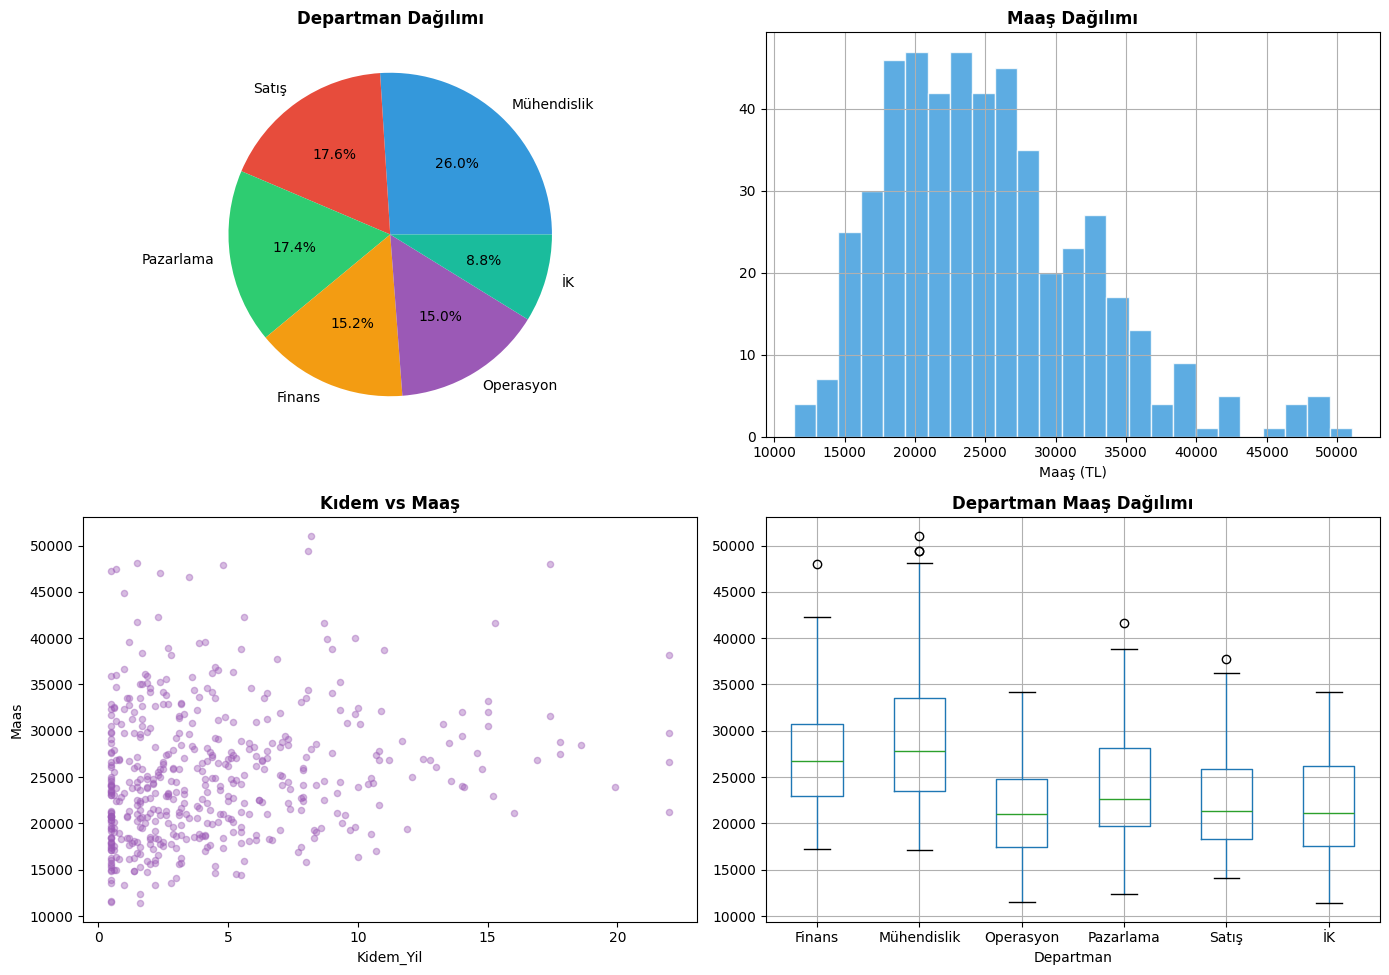

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1) Pasta grafiği – Departman dağılımı
hr['Departman'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[0, 0],
    colors=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C'])
axes[0, 0].set_title('Departman Dağılımı', fontweight='bold')
axes[0, 0].set_ylabel('')

# 2) Histogram – Maaş dağılımı
hr['Maas'].hist(bins=25, ax=axes[0, 1], color='#3498DB',
                edgecolor='white', alpha=0.8)
axes[0, 1].set_title('Maaş Dağılımı', fontweight='bold')
axes[0, 1].set_xlabel('Maaş (TL)')

# 3) Scatter – Kıdem vs Maaş
hr.plot.scatter(x='Kidem_Yil', y='Maas', alpha=0.4,
                color='#9B59B6', ax=axes[1, 0])
axes[1, 0].set_title('Kıdem vs Maaş', fontweight='bold')

# 4) Box plot – Departman maaşları
hr.boxplot(column='Maas', by='Departman', ax=axes[1, 1])
axes[1, 1].set_title('Departman Maaş Dağılımı', fontweight='bold')
plt.suptitle('')  # otomatik başlığı kaldır

plt.tight_layout()
plt.show()

---
## 22. Veri Dışa Aktarma

| Fonksiyon | Dosya Türü |
|-----------|-----------|
| `to_csv()` | CSV dosyası |
| `to_excel()` | Excel dosyası |
| `to_json()` | JSON dosyası |
| `to_html()` | HTML tablosu |
| `to_sql()` | SQL veritabanı |
| `to_clipboard()` | Panoya kopyalama |

In [36]:
# CSV'ye kaydet
hr.to_csv('hr_cikti.csv', index=False, encoding='utf-8-sig')
print('CSV kaydedildi: hr_cikti.csv')

# JSON'a kaydet
hr.head(10).to_json('hr_ornek.json', orient='records', force_ascii=False, indent=2)
print('JSON kaydedildi: hr_ornek.json')

# HTML tablosuna kaydet
hr.head(5).to_html('hr_tablo.html', index=False)
print('HTML kaydedildi: hr_tablo.html')

CSV kaydedildi: hr_cikti.csv
JSON kaydedildi: hr_ornek.json
HTML kaydedildi: hr_tablo.html


---
## 23. Kapsamlı HR Analizi Uygulaması

Aşağıda tüm öğrenilen Pandas fonksiyonlarını birleştiren kapsamlı bir HR analiz senaryosu yer almaktadır:

In [37]:
# ===== KAPSAMLI HR ANALİZ RAPORU =====
print('=' * 60)
print('          HR ANALİTİK RAPORU          ')
print('=' * 60)
print()

# 1) Genel Bakış
print('📋 GENEL BAKIŞ')
print(f'   Toplam çalışan: {len(hr)}')
print(f'   Aktif çalışan: {len(hr[hr["Ayrilma"] == "Aktif"])}')
print(f'   Ayrılan çalışan: {len(hr[hr["Ayrilma"] == "Ayrıldı"])}')
devir_orani = len(hr[hr['Ayrilma'] == 'Ayrıldı']) / len(hr) * 100
print(f'   Devir oranı: %{devir_orani:.1f}')
print()

# 2) Departman Özet
print('🏢 DEPARTMAN ÖZETİ')
dept_rapor = hr.groupby('Departman').agg(
    Sayi=('Calisan_ID', 'count'),
    Ort_Maas=('Maas', 'mean'),
    Ort_Yas=('Yas', 'mean'),
    Ort_Performans=('Performans', 'mean'),
    Ayrilma_Sayisi=('Ayrilma', lambda x: (x == 'Ayrıldı').sum())
).round(1)
dept_rapor['Devir_Orani_%'] = (dept_rapor['Ayrilma_Sayisi'] / dept_rapor['Sayi'] * 100).round(1)
print(dept_rapor)
print()

# 3) Cinsiyet Eşitliği
print('⚖️  CİNSİYET ANALİZİ')
cinsiyet_maas = hr.groupby('Cinsiyet')['Maas'].agg(['mean', 'median']).round(0)
cinsiyet_maas.columns = ['Ortalama_Maas', 'Medyan_Maas']
print(cinsiyet_maas)
maas_farki = abs(cinsiyet_maas.loc['Erkek', 'Ortalama_Maas'] -
                 cinsiyet_maas.loc['Kadın', 'Ortalama_Maas'])
print(f'   Maaş farkı: {maas_farki:,.0f} TL')
print()

# 4) Maaş Aralıkları
print('💰 MAAŞ KATEGORİLERİ')
print(hr['Maas_Kategorisi'].value_counts())
print()

# 5) Riskli Çalışanlar (düşük memnuniyet + düşük maaş)
print('⚠️  RİSKLİ ÇALIŞANLAR (Memnuniyet<4 & Maaş<15000)')
riskli = hr[(hr['Memnuniyet'] < 4) & (hr['Maas'] < 15000) & (hr['Ayrilma'] == 'Aktif')]
print(f'   Tespit edilen: {len(riskli)} çalışan')
if len(riskli) > 0:
    print(riskli[['Ad', 'Departman', 'Maas', 'Memnuniyet', 'Performans']].head(10))

print()
print('✅ Rapor tamamlandı!')

          HR ANALİTİK RAPORU          

📋 GENEL BAKIŞ
   Toplam çalışan: 500
   Aktif çalışan: 413
   Ayrılan çalışan: 87
   Devir oranı: %17.4

🏢 DEPARTMAN ÖZETİ
             Sayi  Ort_Maas  Ort_Yas  Ort_Performans  Ayrilma_Sayisi  \
Departman                                                              
Finans         76   27235.4     34.2             3.5              11   
Mühendislik   130   29504.6     33.7             3.4              24   
Operasyon      75   21713.3     35.7             3.5              15   
Pazarlama      87   24204.0     33.5             3.6              14   
Satış          88   22452.9     35.2             3.3              16   
İK             44   21897.9     32.5             3.4               7   

             Devir_Orani_%  
Departman                   
Finans                14.5  
Mühendislik           18.5  
Operasyon             20.0  
Pazarlama             16.1  
Satış                 18.2  
İK                    15.9  

⚖️  CİNSİYET ANALİZİ
      

---
## 25. Fonksiyon Özet Tablosu

### 25.1 Temel İşlemler

| Fonksiyon | Açıklama | HR Kullanım Alanı |
|-----------|----------|-------------------|
| `pd.Series()` | 1-D etiketli veri oluşturma | Departman listesi |
| `pd.DataFrame()` | 2-D tablo oluşturma | Çalışan tablosu |
| `pd.concat()` | DataFrame birleştirme (alt alta) | Yeni çalışan ekleme |
| `pd.merge()` | Ortak sütunla birleştirme (JOIN) | Departman bütçe tablosu |
| `drop()` | Satır/sütun silme | Gereksiz alan temizleme |

### 25.2 Veri İçe/Dışa Aktarma

| Fonksiyon | Açıklama |
|-----------|----------|
| `read_csv()` / `to_csv()` | CSV okuma / yazma |
| `read_excel()` / `to_excel()` | Excel okuma / yazma |
| `read_json()` / `to_json()` | JSON okuma / yazma |
| `read_sql()` / `to_sql()` | SQL okuma / yazma |

### 25.3 Bilgi ve İstatistik

| Fonksiyon | Açıklama |
|-----------|----------|
| `shape` / `size` | Boyut / eleman sayısı |
| `info()` | Genel bilgi (tip, eksik değer, bellek) |
| `describe()` | İstatistiksel özet |
| `head(n)` / `tail(n)` | İlk/son n kayıt |
| `value_counts()` | Frekans dağılımı |
| `nunique()` / `unique()` | Benzersiz değer sayısı / listesi |
| `mean()` / `median()` / `std()` | Ortalama / Medyan / Standart sapma |
| `sum()` / `min()` / `max()` | Toplam / Minimum / Maksimum |
| `nlargest(n)` / `nsmallest(n)` | En büyük/küçük n değer |
| `corr()` | Korelasyon matrisi |

### 25.4 Filtreleme ve Çıkarma

| Yöntem | Açıklama |
|--------|----------|
| `df[koşul]` | İlişkisel operatörle filtreleme |
| `&` / `\|` | VE / VEYA mantıksal operatörleri |
| `iloc[]` | Konum bazlı seçim (tamsayı) |
| `loc[]` | Etiket bazlı seçim (isim) |
| `isin()` | Liste içinde mi kontrolü |
| `between()` | Aralık kontrolü |
| `str.contains()` | Metin araması |
| `query()` | SQL benzeri sorgu |

### 25.5 İleri Düzey İşlemler

| Fonksiyon | Açıklama |
|-----------|----------|
| `groupby()` + `agg()` | Gruplama + çoklu toplama |
| `pivot_table()` | Pivot tablo oluşturma |
| `crosstab()` | Çapraz tablo |
| `apply()` / `map()` | Fonksiyon uygulama / eleman dönüşümü |
| `isnull().sum()` | Eksik değer tespiti |
| `dropna()` | Eksik değer silme |
| `fillna()` | Eksik değer doldurma |
| `sort_values()` | Sıralama |
| `pd.to_datetime()` | Tarih dönüşümü |
| `.dt.year` / `.dt.month` | Tarih bileşenleri |

---
### 📌 Kaynaklar

- Pandas Resmi Dokümantasyon: https://pandas.pydata.org/docs/
- Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- 10 Minutes to Pandas: https://pandas.pydata.org/docs/user_guide/10min.html

---